In [1]:
#increase the display size to 95% of window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

import os
import shutil
import subprocess
import gc
import xarray as xr
import numpy as np
import pymp

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.transforms import Bbox
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# from scipy.interpolate import interp1d
# from scipy.interpolate import interp2d

# from functions.mandyocIO import read_mandyoc_output, read_datasets, read_particle_path, single_plot, change_dataset

Lz/Lx = 0.3


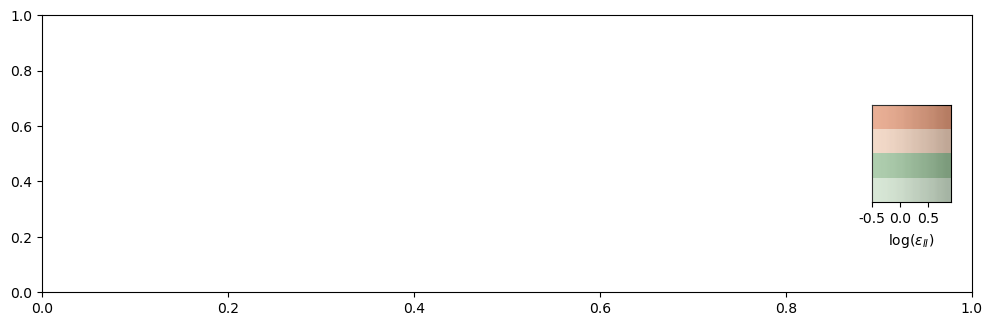

In [194]:
# Lx = 4000.0e3
# Lz = 700.0e3

Lx = 1000.0e3
Lz = 300.0e3

print(f"Lz/Lx = {Lz/Lx}")
fig, ax = plt.subplots(1, 1, figsize=(12, 12*(Lz/Lx)))
bv1 = inset_axes(ax,
                loc='lower right',
                width="100%",  # respective to parent_bbox width
                height="100%",  # respective to parent_bbox width
                bbox_to_anchor=(0.9,#horizontal position respective to parent_bbox or "loc" position
                                0.3,# vertical position
                                0.085,# width
                                0.35),# height
                bbox_transform=ax.transAxes
                )

# bv1.grid()
cr = 255.
color_uc = (228. / cr, 156. / cr, 124. / cr)
color_lc = (240. / cr, 209. / cr, 188. / cr)
color_lit = (155. / cr, 194. / cr, 155. / cr)
color_ast = (207. / cr, 226. / cr, 205. / cr)
A = np.zeros((100, 10))

A[:25, :] = 2700
A[25:50, :] = 2800
A[50:75, :] = 3300
A[75:100, :] = 3400

A = A[::-1, :]

xA = np.linspace(-0.5, 0.9, 10)
yA = np.linspace(0, 1.5, 100)

xxA, yyA = np.meshgrid(xA, yA)
air_threshold = 200

bv1.contourf(
        xxA,
        yyA,
        A,
        levels=[air_threshold, 2750, 2900, 3365, 3900],
        colors=[color_uc, color_lc, color_lit, color_ast],
        extent=[-0.5, 0.9, 0, 1.5]
)

bv1.imshow(
        xxA[::-1, :],
        extent=[-0.5, 0.9, 0, 1.5],
        zorder=100,
        alpha=0.2,
        cmap=plt.get_cmap("Greys"),
        vmin=-0.5,
        vmax=0.9,
        aspect='auto'
)

bv1.set_yticklabels([])
bv1.set_xlabel(r"log$(\varepsilon_{II})$", size=10)
bv1.tick_params(axis='x', which='major', labelsize=10)
bv1.set_xticks([-0.5, 0, 0.5])
bv1.set_yticks([])
bv1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

Lz/Lx = 0.175


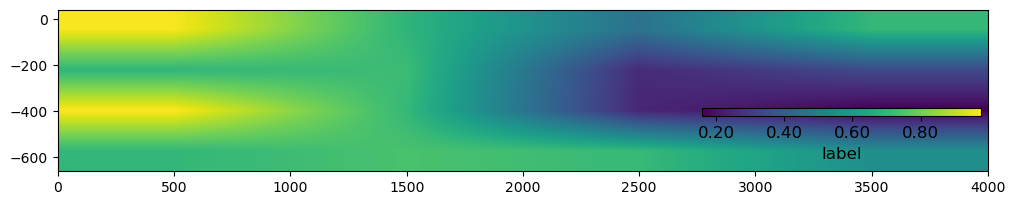

In [218]:
Lx = 4000.0e3
Lz = 700.0e3

# Lx = 1000.0e3
# Lz = 300.0e3

np.random.seed(19680801)

grid = np.random.rand(4, 4)

print(f"Lz/Lx = {Lz/Lx}")
fig, ax = plt.subplots(1, 1, figsize=(12, 12*(Lz/Lx)))

im = ax.imshow(grid, interpolation='bilinear',
        cmap='viridis', origin='lower',
        extent = (0, Lx / 1.0E3, -Lz / 1.0E3 + 40, 0 + 40),
        aspect='auto')

axins1 = inset_axes(ax,
                loc='lower right',
                width="100%",  # respective to parent_bbox width
                height="100%",  # respective to parent_bbox width
                bbox_to_anchor=(0.7,#horizontal position respective to parent_bbox or "loc" position
                                0.3,# vertical position
                                0.30,# width
                                0.05),# height
                bbox_transform=ax.transAxes
                )
fmt = '%.2f'
clb = fig.colorbar(im,
                   cax=axins1,
#                            ticks=ticks,
                   orientation='horizontal',
                   fraction=0.08,
                   pad=0.2,
                   format=fmt)

clb.set_label('label', fontsize=12)
clb.ax.tick_params(labelsize=12)
clb.minorticks_off()



In [ ]:
}